Importing the required packages.

In [1]:
from google.colab import drive
import zipfile
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import LeakyReLU

Importing the dataset from my Google Drive.

In [2]:
drive.mount('/content/drive')

zip_path = '/content/drive/My Drive/dataset.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))


Mounted at /content/drive
['training', 'test', 'validation']


Assigning the labels.

In [3]:
# Paths to data directories
train_dir = os.path.join(extract_path, 'training')
val_dir = os.path.join(extract_path, 'validation')
test_dir = os.path.join(extract_path, 'test')

# Class names
class_names = ["Aserai Recruit", "Battanian Volunteer", "Imperial Recruit",
               "Khuzait Nomad", "Sturgian Recruit", "Vlandian Recruit"]

Data generators.

In [4]:
# ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Displaying a few images to make sure everything works as intended.

Training set:


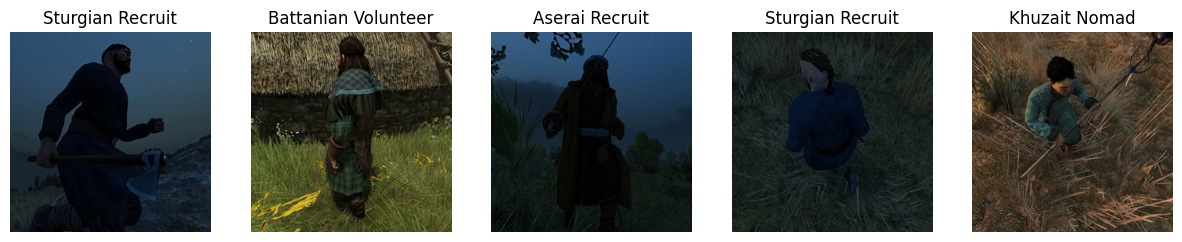

Validation set:


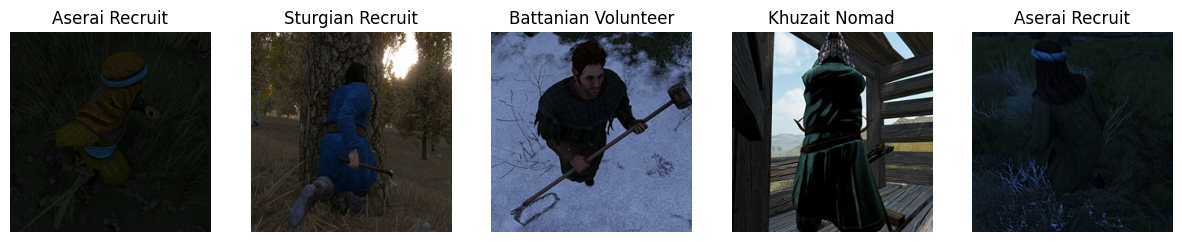

Test set:


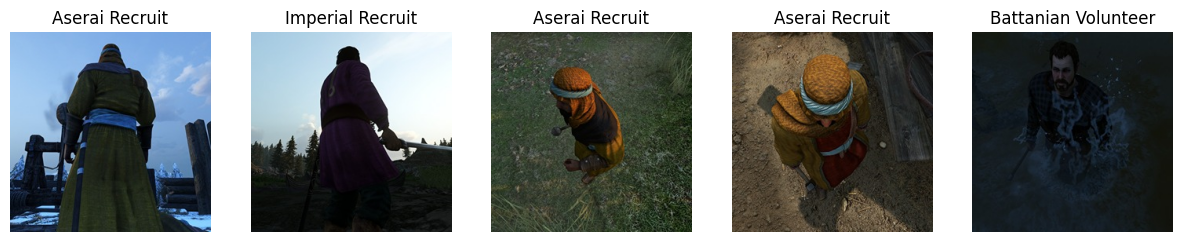

In [5]:
# Function to display images
def show_images(generator, class_names, num_images=5):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[np.argmax(labels[i])])
        axes[i].axis('off')
    plt.show()

# Display a few images from the training set
print("Training set:")
show_images(train_generator, class_names, num_images=5)

# Display a few images from the validation set
print("Validation set:")
show_images(val_generator, class_names, num_images=5)

# Display a few images from the test set
print("Test set:")
show_images(test_generator, class_names, num_images=5)

Functions to display the results.

In [5]:
def plot_model_accuracy(history):
  loss_train = history.history['accuracy']
  loss_val = history.history['val_accuracy']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def plot_model_loss(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

Model 1.

In [ ]:
model1 = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

Compiling Model 1.

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training Model 1.

In [ ]:
history = model1.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2)

Epoch 1/200
132/132 - 22s - loss: 0.9809 - accuracy: 0.6112 - val_loss: 0.5900 - val_accuracy: 0.8067 - 22s/epoch - 169ms/step
Epoch 2/200
132/132 - 11s - loss: 0.3211 - accuracy: 0.8874 - val_loss: 0.4293 - val_accuracy: 0.8700 - 11s/epoch - 81ms/step
Epoch 3/200
132/132 - 12s - loss: 0.2495 - accuracy: 0.9143 - val_loss: 0.4233 - val_accuracy: 0.8533 - 12s/epoch - 91ms/step
Epoch 4/200
132/132 - 12s - loss: 0.2025 - accuracy: 0.9298 - val_loss: 0.5531 - val_accuracy: 0.8500 - 12s/epoch - 88ms/step
Epoch 5/200
132/132 - 11s - loss: 0.1503 - accuracy: 0.9481 - val_loss: 0.6856 - val_accuracy: 0.8100 - 11s/epoch - 87ms/step
Epoch 6/200
132/132 - 11s - loss: 0.0853 - accuracy: 0.9740 - val_loss: 0.4822 - val_accuracy: 0.8700 - 11s/epoch - 86ms/step
Epoch 7/200
132/132 - 11s - loss: 0.0931 - accuracy: 0.9667 - val_loss: 0.3809 - val_accuracy: 0.8967 - 11s/epoch - 85ms/step
Epoch 8/200
132/132 - 12s - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.4121 - val_accuracy: 0.9000 - 12s/epoch - 8

Results of Model 1.

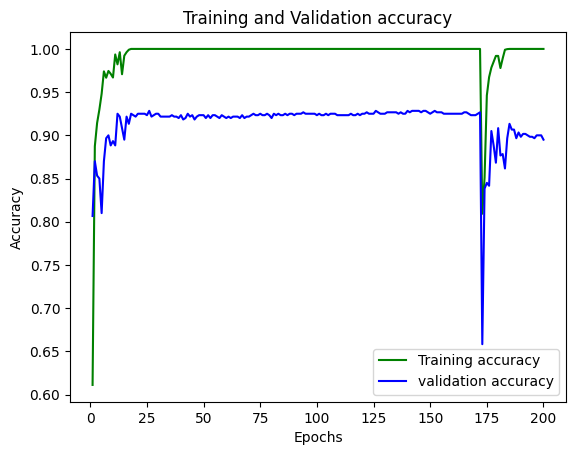

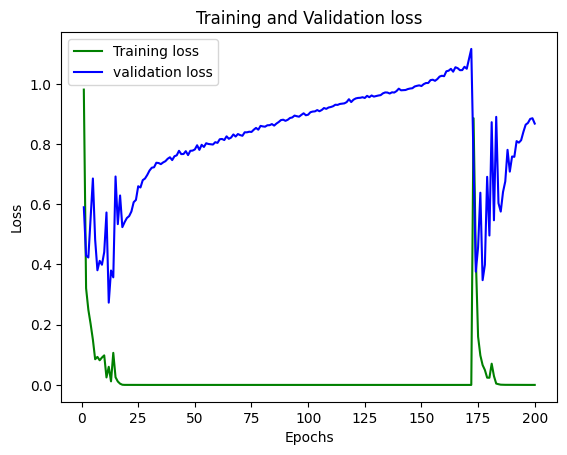

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 2.

In [ ]:
model2 = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 123, 123, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 128)      

Compiling Model 2.

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training Model 2.

In [ ]:
history = model2.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2)

Epoch 1/200
33/33 - 116s - loss: 1.7742 - accuracy: 0.2050 - val_loss: 1.7199 - val_accuracy: 0.3433 - 116s/epoch - 4s/step
Epoch 2/200
33/33 - 75s - loss: 1.6680 - accuracy: 0.2974 - val_loss: 1.5671 - val_accuracy: 0.3483 - 75s/epoch - 2s/step
Epoch 3/200
33/33 - 77s - loss: 1.4919 - accuracy: 0.3979 - val_loss: 1.2447 - val_accuracy: 0.4967 - 77s/epoch - 2s/step
Epoch 4/200
33/33 - 76s - loss: 1.2594 - accuracy: 0.5136 - val_loss: 0.9852 - val_accuracy: 0.5983 - 76s/epoch - 2s/step
Epoch 5/200
33/33 - 76s - loss: 1.0361 - accuracy: 0.6162 - val_loss: 0.8710 - val_accuracy: 0.6383 - 76s/epoch - 2s/step
Epoch 6/200
33/33 - 77s - loss: 0.7933 - accuracy: 0.7052 - val_loss: 0.7871 - val_accuracy: 0.6683 - 77s/epoch - 2s/step
Epoch 7/200
33/33 - 74s - loss: 0.6661 - accuracy: 0.7610 - val_loss: 0.7350 - val_accuracy: 0.7467 - 74s/epoch - 2s/step
Epoch 8/200
33/33 - 76s - loss: 0.5629 - accuracy: 0.7995 - val_loss: 0.7883 - val_accuracy: 0.7333 - 76s/epoch - 2s/step
Epoch 9/200
33/33 - 76

Results of Model 2.

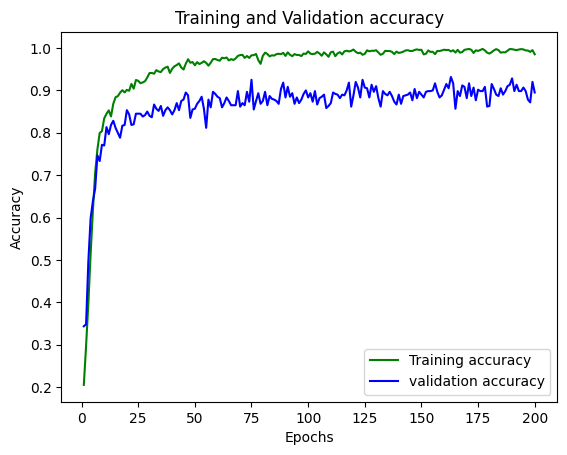

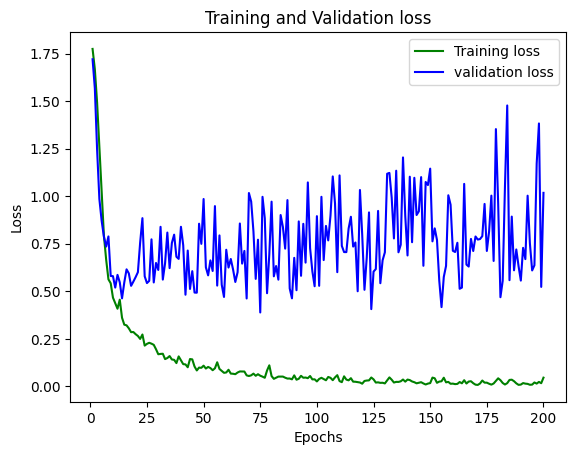

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 3.

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.25),
    layers.Dense(6, activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)     

Compiling Model 3.

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training Model 3.

In [ ]:
history = model3.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2)

Epoch 1/200
132/132 - 91s - loss: 1.4066 - accuracy: 0.4957 - val_loss: 2.1680 - val_accuracy: 0.1233 - 91s/epoch - 690ms/step
Epoch 2/200
132/132 - 76s - loss: 0.8572 - accuracy: 0.6938 - val_loss: 2.4383 - val_accuracy: 0.2650 - 76s/epoch - 572ms/step
Epoch 3/200
132/132 - 74s - loss: 0.6521 - accuracy: 0.7643 - val_loss: 2.6242 - val_accuracy: 0.2933 - 74s/epoch - 559ms/step
Epoch 4/200
132/132 - 74s - loss: 0.5300 - accuracy: 0.8093 - val_loss: 1.7523 - val_accuracy: 0.4750 - 74s/epoch - 558ms/step
Epoch 5/200
132/132 - 75s - loss: 0.4593 - accuracy: 0.8443 - val_loss: 1.2684 - val_accuracy: 0.6000 - 75s/epoch - 566ms/step
Epoch 6/200
132/132 - 74s - loss: 0.4197 - accuracy: 0.8574 - val_loss: 0.7335 - val_accuracy: 0.7617 - 74s/epoch - 562ms/step
Epoch 7/200
132/132 - 75s - loss: 0.3638 - accuracy: 0.8764 - val_loss: 0.9568 - val_accuracy: 0.7883 - 75s/epoch - 567ms/step
Epoch 8/200
132/132 - 76s - loss: 0.3364 - accuracy: 0.8798 - val_loss: 0.9214 - val_accuracy: 0.7117 - 76s/epo

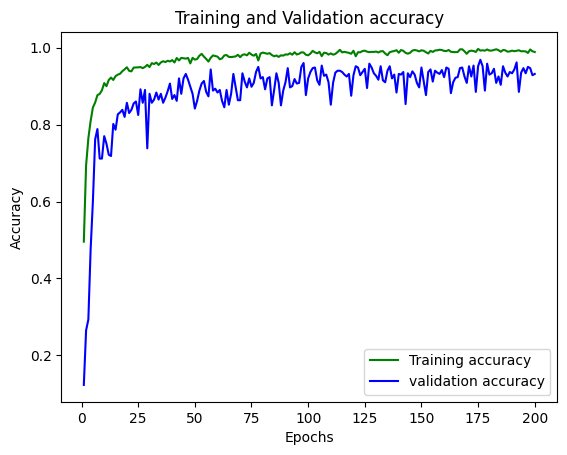

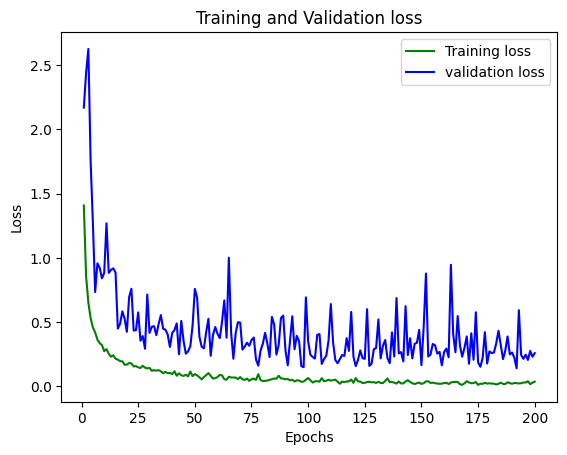

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

More aggressive data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 4.

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Dropout
from tensorflow.keras import layers, models

model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.25),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.25),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

Checkpoints to save the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Compiling Model 4.

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training Model 4.

In [ ]:
history = model4.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 121s - loss: 1.9563 - accuracy: 0.3300 - val_loss: 2.1657 - val_accuracy: 0.1617 - 121s/epoch - 919ms/step
Epoch 2/200
132/132 - 94s - loss: 1.5289 - accuracy: 0.4612 - val_loss: 2.4449 - val_accuracy: 0.2000 - 94s/epoch - 711ms/step
Epoch 3/200
132/132 - 98s - loss: 1.3349 - accuracy: 0.5271 - val_loss: 2.4879 - val_accuracy: 0.1817 - 98s/epoch - 742ms/step
Epoch 4/200
132/132 - 91s - loss: 1.1415 - accuracy: 0.5821 - val_loss: 2.0024 - val_accuracy: 0.3167 - 91s/epoch - 691ms/step
Epoch 5/200
132/132 - 92s - loss: 1.0275 - accuracy: 0.6200 - val_loss: 1.4337 - val_accuracy: 0.3817 - 92s/epoch - 694ms/step
Epoch 6/200
132/132 - 93s - loss: 0.9386 - accuracy: 0.6538 - val_loss: 1.3396 - val_accuracy: 0.5083 - 93s/epoch - 703ms/step
Epoch 7/200
132/132 - 95s - loss: 0.8456 - accuracy: 0.6890 - val_loss: 1.1714 - val_accuracy: 0.5383 - 95s/epoch - 717ms/step
Epoch 8/200
132/132 - 94s - loss: 0.8083 - accuracy: 0.7100 - val_loss: 1.1736 - val_accuracy: 0.5250 - 94s/epoch - 715ms

Results of Model 4.

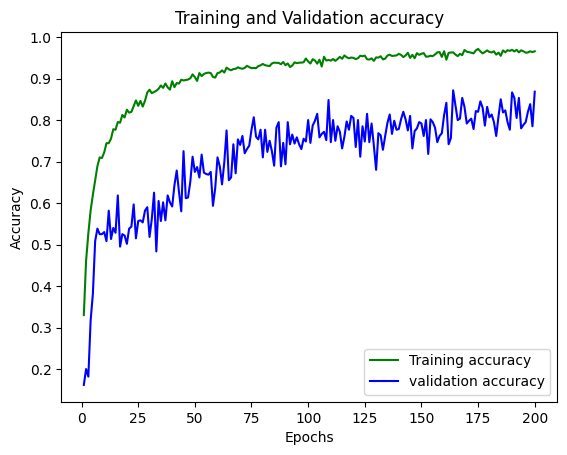

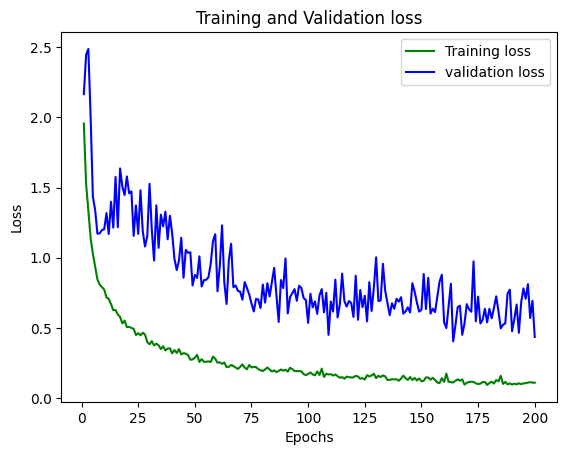

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Mild data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 5.

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU

model5 = models.Sequential([
  layers.Conv2D(16, (3, 3), input_shape=(256, 256, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Conv2D(32, (3, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Conv2D(64, (3, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Conv2D(128, (3, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Conv2D(128, (3, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Conv2D(256, (3, 3)),
  LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2)),
  Dropout(0.2),

  layers.Flatten(),

  layers.Dense(512),
  LeakyReLU(alpha=0.01),

  Dropout(0.2),
  layers.Dense(6, activation='softmax')
])

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 125, 125, 32)      0         
                                                      

Saving the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model5'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model5/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Compiling Model 5.

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training Model 5.

In [ ]:
history = model5.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/200
132/132 - 83s - loss: 1.7712 - accuracy: 0.2060 - val_loss: 1.7736 - val_accuracy: 0.2117 - 83s/epoch - 632ms/step
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 75s - loss: 1.6537 - accuracy: 0.3164 - val_loss: 1.5535 - val_accuracy: 0.3800 - 75s/epoch - 569ms/step
Epoch 3/200
132/132 - 78s - loss: 1.3292 - accuracy: 0.4681 - val_loss: 1.3387 - val_accuracy: 0.4467 - 78s/epoch - 593ms/step
Epoch 4/200
132/132 - 77s - loss: 1.0541 - accuracy: 0.5905 - val_loss: 1.1099 - val_accuracy: 0.5000 - 77s/epoch - 582ms/step
Epoch 5/200
132/132 - 76s - loss: 0.8015 - accuracy: 0.7093 - val_loss: 0.9418 - val_accuracy: 0.5683 - 76s/epoch - 575ms/step
Epoch 6/200
132/132 - 81s - loss: 0.5982 - accuracy: 0.7867 - val_loss: 0.7704 - val_accuracy: 0.6483 - 81s/epoch - 617ms/step
Epoch 7/200
132/132 - 76s - loss: 0.5286 - accuracy: 0.8167 - val_loss: 0.7633 - val_accuracy: 0.6550 - 76s/epoch - 579ms/step
Epoch 8/200
132/132 - 78s - loss: 0.4640 - accuracy: 0.8362 - val_loss: 0.6621 - val_accuracy: 0.6933 - 78s/epoch - 590ms/step
Epoch 9/200
132/132 - 77s - loss: 0.4117 - accuracy: 0.8619 - val_loss: 0.8153 - val_accuracy: 0.6483 - 77s/epoch - 581ms/s

Results of Model 5.

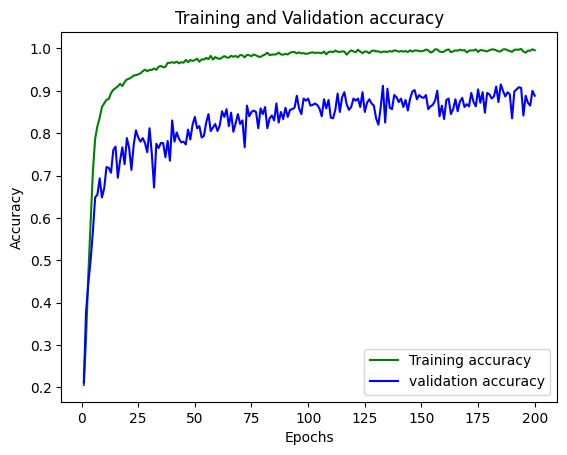

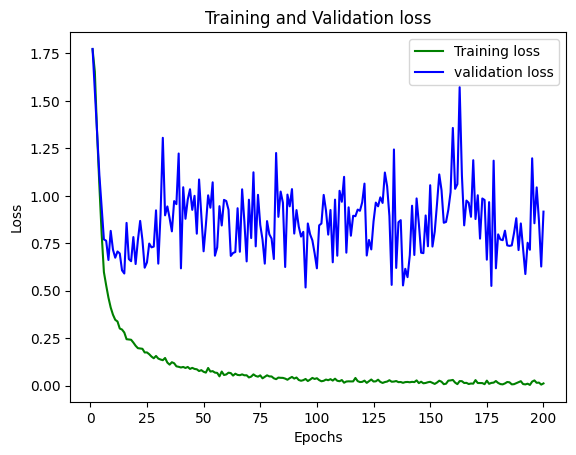

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Preparing to save the model.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model6'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model6/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Model 6.

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model6 = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.25),
    layers.Dense(6, activation='softmax')
])

model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

Compiling Model 6.

In [ ]:
model6.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training Model 6.

In [ ]:
history = model6.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 - 138s - loss: 1.5173 - accuracy: 0.4593 - val_loss: 1.8164 - val_accuracy: 0.1667 - 138s/epoch - 4s/step
Epoch 2/200
33/33 - 87s - loss: 0.8289 - accuracy: 0.6921 - val_loss: 1.8565 - val_accuracy: 0.1667 - 87s/epoch - 3s/step
Epoch 3/200
33/33 - 82s - loss: 0.6305 - accuracy: 0.7764 - val_loss: 1.9231 - val_accuracy: 0.1650 - 82s/epoch - 2s/step
Epoch 4/200
33/33 - 86s - loss: 0.4977 - accuracy: 0.8148 - val_loss: 1.9617 - val_accuracy: 0.1517 - 86s/epoch - 3s/step
Epoch 5/200
33/33 - 84s - loss: 0.3943 - accuracy: 0.8600 - val_loss: 1.9445 - val_accuracy: 0.2033 - 84s/epoch - 3s/step
Epoch 6/200
33/33 - 87s - loss: 0.3758 - accuracy: 0.8648 - val_loss: 2.2442 - val_accuracy: 0.1433 - 87s/epoch - 3s/step
Epoch 7/200
33/33 - 84s - loss: 0.3448 - accuracy: 0.8788 - val_loss: 2.1699 - val_accuracy: 0.1883 - 84s/epoch - 3s/step
Epoch 8/200
33/33 - 83s - loss: 0.2883 - accuracy: 0.8948 - val_loss: 2.5963 - val_accuracy: 0.2383 - 83s/epoch - 3s/step
Epoch 9/200
33/33 - 85s - loss: 0.

Results of Model 6.

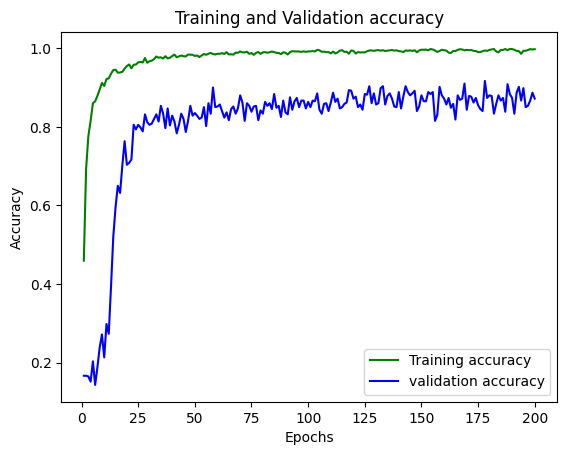

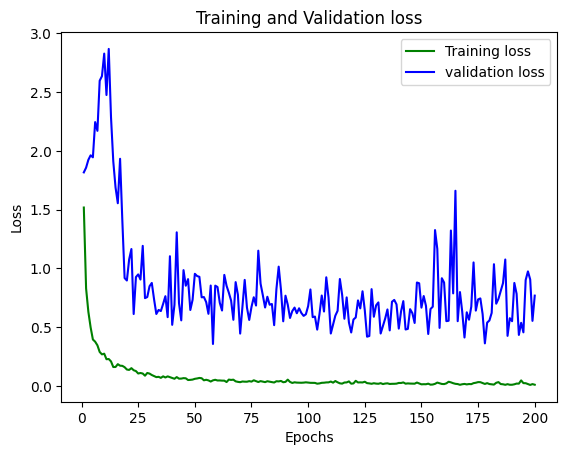

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Loading the best model.

In [6]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/My Drive/epoch_178.h5')

Evaluating the model on the test data.

In [7]:
test_loss, test_accuracy = best_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

38/38 [==============================] - 8s 103ms/step - loss: 0.8824 - accuracy: 0.8475
Test Accuracy: 84.75%
Test Loss: 0.8824


Importing MobileNet for Transfer learning.

In [ ]:
from tensorflow.keras.applications import MobileNet

pre_trained_model = MobileNet(weights='imagenet',
                              include_top=False,
                              input_shape=(256, 256, 3))

pre_trained_model.trainable = False
for layer in pre_trained_model.layers:
  layer.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


Model 7.

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

model7 = keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(6, activation='softmax')
])

model7.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 36786886 (140.33 MB)
Trainable params: 33558022 (128.01 MB)
Non-trainable params: 3228864 (12.32 MB)
_______

Saving the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model7'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model7/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Training Model 7.

In [ ]:
history = model7.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=100,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 18s - loss: 2.3434 - accuracy: 0.7081 - val_loss: 0.8624 - val_accuracy: 0.7817 - 18s/epoch - 138ms/step
Epoch 2/100
132/132 - 15s - loss: 0.2248 - accuracy: 0.9410 - val_loss: 0.7477 - val_accuracy: 0.7900 - 15s/epoch - 116ms/step
Epoch 3/100
132/132 - 12s - loss: 0.1143 - accuracy: 0.9736 - val_loss: 0.7993 - val_accuracy: 0.8233 - 12s/epoch - 92ms/step
Epoch 4/100
132/132 - 12s - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.9431 - val_accuracy: 0.8500 - 12s/epoch - 88ms/step
Epoch 5/100
132/132 - 11s - loss: 0.0345 - accuracy: 0.9914 - val_loss: 1.4475 - val_accuracy: 0.8133 - 11s/epoch - 85ms/step
Epoch 6/100
132/132 - 11s - loss: 0.0264 - accuracy: 0.9943 - val_loss: 1.4357 - val_accuracy: 0.8250 - 11s/epoch - 86ms/step
Epoch 7/100
132/132 - 11s - loss: 0.0276 - accuracy: 0.9921 - val_loss: 1.6881 - val_accuracy: 0.8067 - 11s/epoch - 85ms/step
Epoch 8/100
132/132 - 13s - loss: 0.0121 - accuracy: 0.9955 - val_loss: 1.2541 - val_accuracy: 0.8483 - 13s/epoch - 97ms/step
Ep

Results of Model 7.

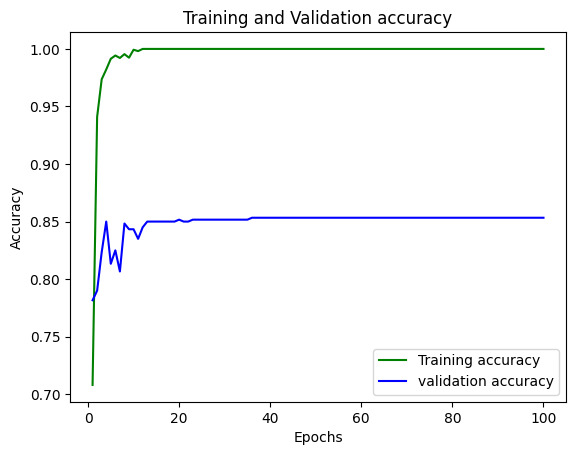

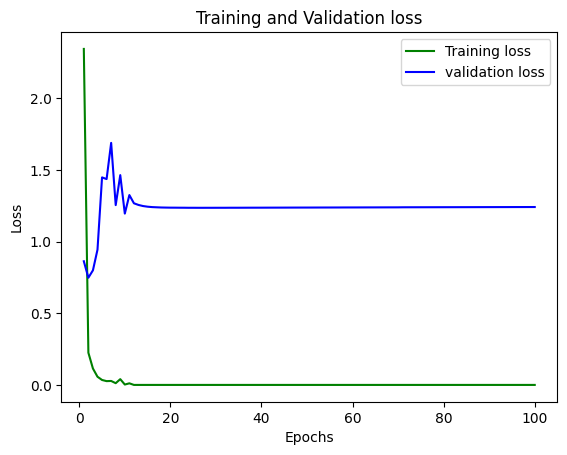

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Model 8.

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

model8 = keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(6, activation='softmax')
])

model8.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                        

Saving the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model8'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model8/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Training model 8.

In [ ]:
history = model8.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=100,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 20s - loss: 2.1372 - accuracy: 0.6926 - val_loss: 0.5495 - val_accuracy: 0.8200 - 20s/epoch - 151ms/step
Epoch 2/100
132/132 - 13s - loss: 0.2065 - accuracy: 0.9405 - val_loss: 0.7836 - val_accuracy: 0.8100 - 13s/epoch - 101ms/step
Epoch 3/100
132/132 - 12s - loss: 0.0991 - accuracy: 0.9769 - val_loss: 1.3591 - val_accuracy: 0.7717 - 12s/epoch - 90ms/step
Epoch 4/100
132/132 - 13s - loss: 0.0662 - accuracy: 0.9838 - val_loss: 1.5176 - val_accuracy: 0.7933 - 13s/epoch - 95ms/step
Epoch 5/100
132/132 - 12s - loss: 0.0436 - accuracy: 0.9871 - val_loss: 1.7230 - val_accuracy: 0.7967 - 12s/epoch - 93ms/step
Epoch 6/100
132/132 - 12s - loss: 0.0478 - accuracy: 0.9886 - val_loss: 1.3132 - val_accuracy: 0.8183 - 12s/epoch - 89ms/step
Epoch 7/100
132/132 - 12s - loss: 0.0532 - accuracy: 0.9871 - val_loss: 1.2779 - val_accuracy: 0.8367 - 12s/epoch - 95ms/step
Epoch 8/100
132/132 - 11s - loss: 0.0226 - accuracy: 0.9948 - val_loss: 1.4857 - val_accuracy: 0.8300 - 11s/epoch - 86ms/step
Ep

Results of Model 8.

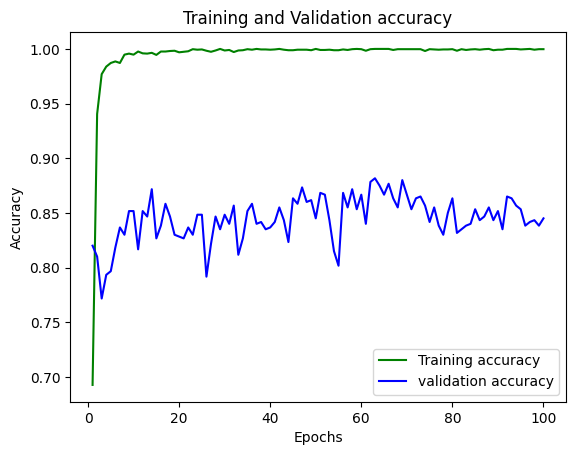

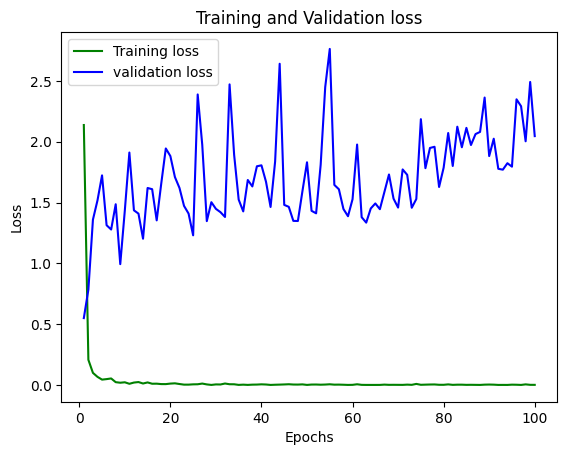

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.0],
    channel_shift_range=150
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 9.

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

model9 = keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(6, activation='softmax')
])

model9.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                        

Preparing to save the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model9'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model9/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Training Model 9.

In [ ]:
history = model9.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=100,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 - 103s - loss: 6.1649 - accuracy: 0.2300 - val_loss: 1.7511 - val_accuracy: 0.2967 - 103s/epoch - 3s/step
Epoch 2/100
33/33 - 93s - loss: 2.1792 - accuracy: 0.2555 - val_loss: 2.2254 - val_accuracy: 0.2367 - 93s/epoch - 3s/step
Epoch 3/100
33/33 - 93s - loss: 2.1841 - accuracy: 0.2848 - val_loss: 1.3405 - val_accuracy: 0.4617 - 93s/epoch - 3s/step
Epoch 4/100
33/33 - 94s - loss: 1.9942 - accuracy: 0.3262 - val_loss: 2.0759 - val_accuracy: 0.3483 - 94s/epoch - 3s/step
Epoch 5/100
33/33 - 93s - loss: 2.1029 - accuracy: 0.3171 - val_loss: 1.8040 - val_accuracy: 0.3467 - 93s/epoch - 3s/step
Epoch 6/100
33/33 - 94s - loss: 2.0060 - accuracy: 0.3295 - val_loss: 1.3404 - val_accuracy: 0.4733 - 94s/epoch - 3s/step
Epoch 7/100
33/33 - 92s - loss: 1.8423 - accuracy: 0.3521 - val_loss: 1.3284 - val_accuracy: 0.4900 - 92s/epoch - 3s/step
Epoch 8/100
33/33 - 92s - loss: 1.9023 - accuracy: 0.3605 - val_loss: 1.5591 - val_accuracy: 0.4683 - 92s/epoch - 3s/step
Epoch 9/100
33/33 - 91s - loss: 1.

Results of Model 9.

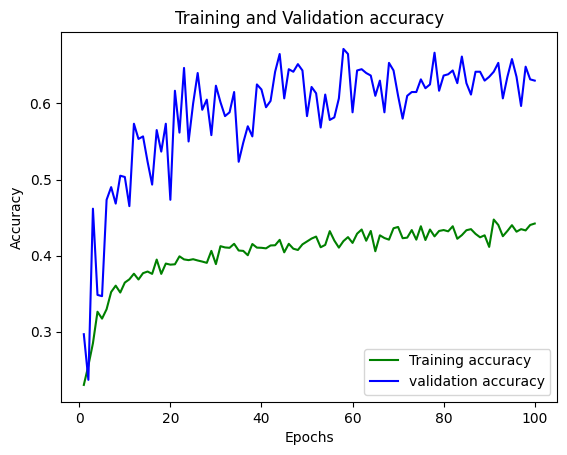

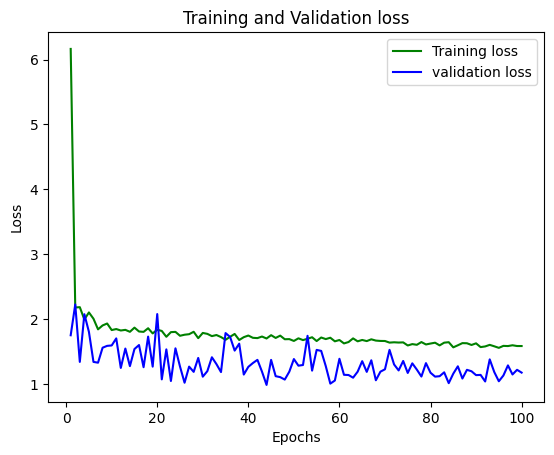

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 10.

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

model10 = keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(512),
    LeakyReLU(alpha=0.1),
    layers.Dense(6, activation='softmax')
])

model10.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                        

Preparing to save the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model10'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model10/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Training Model 10.

In [ ]:
history = model10.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=100,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 - 95s - loss: 9.9658 - accuracy: 0.3038 - val_loss: 1.9640 - val_accuracy: 0.5117 - 95s/epoch - 3s/step
Epoch 2/100
33/33 - 80s - loss: 2.5163 - accuracy: 0.4105 - val_loss: 2.0186 - val_accuracy: 0.4950 - 80s/epoch - 2s/step
Epoch 3/100
33/33 - 80s - loss: 2.2188 - accuracy: 0.4962 - val_loss: 2.3011 - val_accuracy: 0.5950 - 80s/epoch - 2s/step
Epoch 4/100
33/33 - 79s - loss: 1.9461 - accuracy: 0.5495 - val_loss: 1.1601 - val_accuracy: 0.6417 - 79s/epoch - 2s/step
Epoch 5/100
33/33 - 86s - loss: 1.6419 - accuracy: 0.6010 - val_loss: 1.0955 - val_accuracy: 0.6400 - 86s/epoch - 3s/step
Epoch 6/100
33/33 - 79s - loss: 1.5521 - accuracy: 0.6098 - val_loss: 1.0741 - val_accuracy: 0.6633 - 79s/epoch - 2s/step
Epoch 7/100
33/33 - 81s - loss: 1.3239 - accuracy: 0.6524 - val_loss: 1.6762 - val_accuracy: 0.6267 - 81s/epoch - 2s/step
Epoch 8/100
33/33 - 83s - loss: 1.4379 - accuracy: 0.6419 - val_loss: 1.3285 - val_accuracy: 0.6967 - 83s/epoch - 3s/step
Epoch 9/100
33/33 - 78s - loss: 1.03

Results of Model 10.

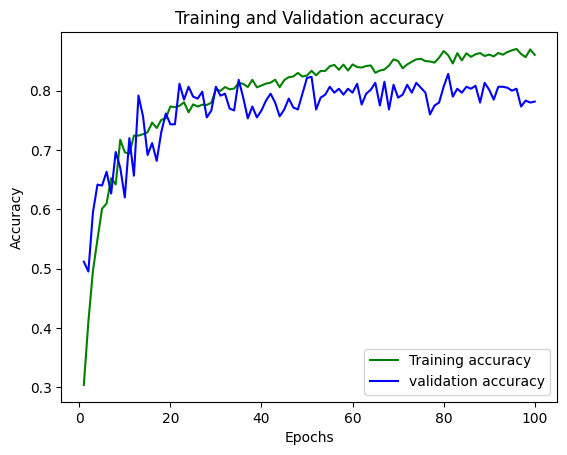

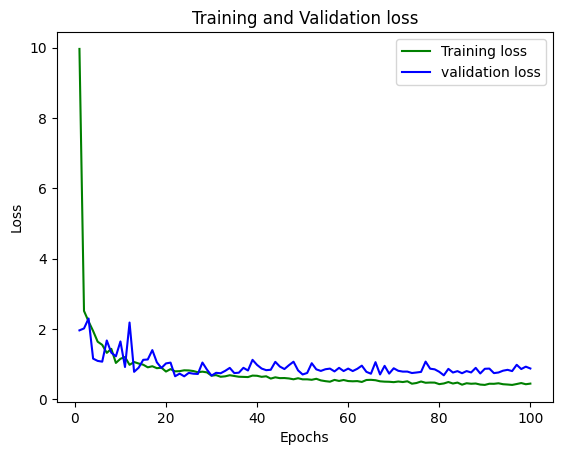

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=60,
    width_shift_range=0.28,
    height_shift_range=0.28,
    shear_range=0.28,
    zoom_range=0.28,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Model 11.

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model11 = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.25),
    layers.Dense(6, activation='softmax')
])

model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

Compiling Model 11.

In [ ]:
model11.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Preparing to save the model at each epoch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model11'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model11/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

Training Model 11.

In [ ]:
history = model11.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 101s - loss: 1.4900 - accuracy: 0.4636 - val_loss: 1.9810 - val_accuracy: 0.1700 - 101s/epoch - 764ms/step
Epoch 2/200
132/132 - 79s - loss: 0.9168 - accuracy: 0.6657 - val_loss: 2.2696 - val_accuracy: 0.2600 - 79s/epoch - 602ms/step
Epoch 3/200
132/132 - 78s - loss: 0.6978 - accuracy: 0.7426 - val_loss: 3.2496 - val_accuracy: 0.2583 - 78s/epoch - 590ms/step
Epoch 4/200
132/132 - 78s - loss: 0.5711 - accuracy: 0.7969 - val_loss: 2.9658 - val_accuracy: 0.3783 - 78s/epoch - 589ms/step
Epoch 5/200
132/132 - 77s - loss: 0.4944 - accuracy: 0.8240 - val_loss: 1.5711 - val_accuracy: 0.5517 - 77s/epoch - 581ms/step
Epoch 6/200
132/132 - 79s - loss: 0.4672 - accuracy: 0.8314 - val_loss: 1.0218 - val_accuracy: 0.6517 - 79s/epoch - 599ms/step
Epoch 7/200
132/132 - 76s - loss: 0.4183 - accuracy: 0.8498 - val_loss: 0.8025 - val_accuracy: 0.7667 - 76s/epoch - 578ms/step
Epoch 8/200
132/132 - 77s - loss: 0.3669 - accuracy: 0.8667 - val_loss: 0.6555 - val_accuracy: 0.7950 - 77s/epoch - 587ms

Results of Model 11.

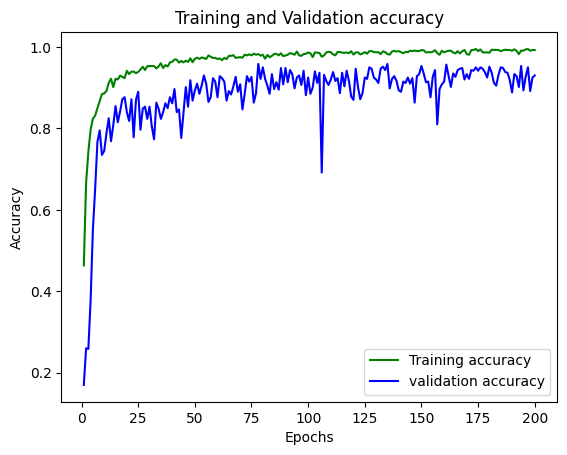

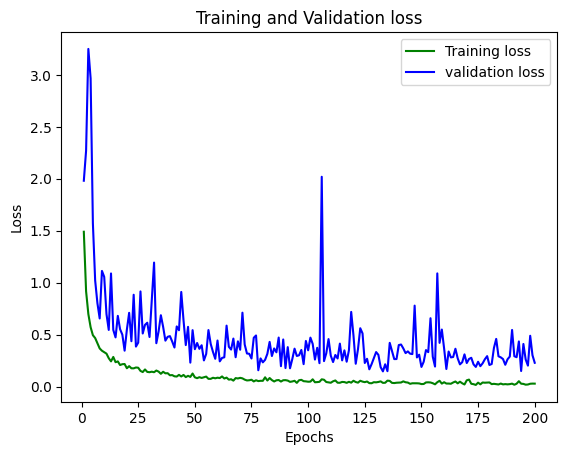

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Loading the best epoch from Model 11.

In [8]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/My Drive/epoch_161.h5')

Testing on the test set.

In [9]:
test_loss, test_accuracy = best_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

38/38 [==============================] - 3s 73ms/step - loss: 0.2653 - accuracy: 0.9250
Test Accuracy: 92.50%
Test Loss: 0.2653


Model 3 again, to save the best epoch.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4200 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU

model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(64, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.25),
    layers.Dense(6, activation='softmax')
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.00008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

save_dir = 'content/best_model3'
os.makedirs(save_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    'content/best_model3/epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_freq='epoch'
)

In [ ]:
history = model3.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,
                    validation_steps=len(val_generator),
                    verbose=2,
                    callbacks=[checkpoint_callback])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 - 101s - loss: 1.4463 - accuracy: 0.4936 - val_loss: 2.1522 - val_accuracy: 0.2050 - 101s/epoch - 764ms/step
Epoch 2/200
132/132 - 83s - loss: 0.8725 - accuracy: 0.6814 - val_loss: 2.3588 - val_accuracy: 0.2750 - 83s/epoch - 629ms/step
Epoch 3/200
132/132 - 78s - loss: 0.6527 - accuracy: 0.7610 - val_loss: 2.4150 - val_accuracy: 0.4250 - 78s/epoch - 593ms/step
Epoch 4/200
132/132 - 82s - loss: 0.5893 - accuracy: 0.7929 - val_loss: 2.0878 - val_accuracy: 0.4917 - 82s/epoch - 619ms/step
Epoch 5/200
132/132 - 78s - loss: 0.4804 - accuracy: 0.8236 - val_loss: 1.4489 - val_accuracy: 0.6683 - 78s/epoch - 588ms/step
Epoch 6/200
132/132 - 80s - loss: 0.4212 - accuracy: 0.8512 - val_loss: 0.6878 - val_accuracy: 0.7567 - 80s/epoch - 607ms/step
Epoch 7/200
132/132 - 78s - loss: 0.4190 - accuracy: 0.8490 - val_loss: 0.6317 - val_accuracy: 0.7600 - 78s/epoch - 594ms/step
Epoch 8/200
132/132 - 80s - loss: 0.3637 - accuracy: 0.8755 - val_loss: 0.9290 - val_accuracy: 0.7433 - 80s/epoch - 603ms

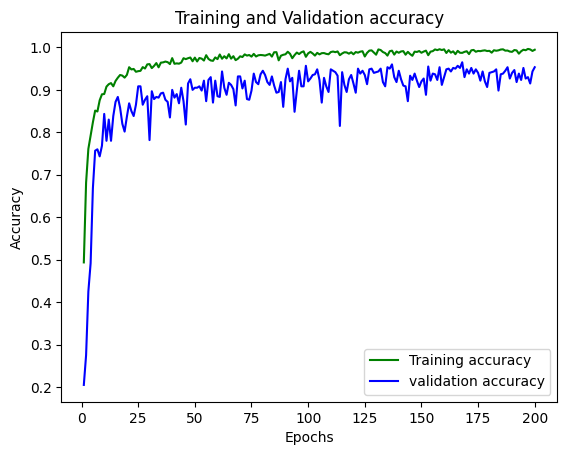

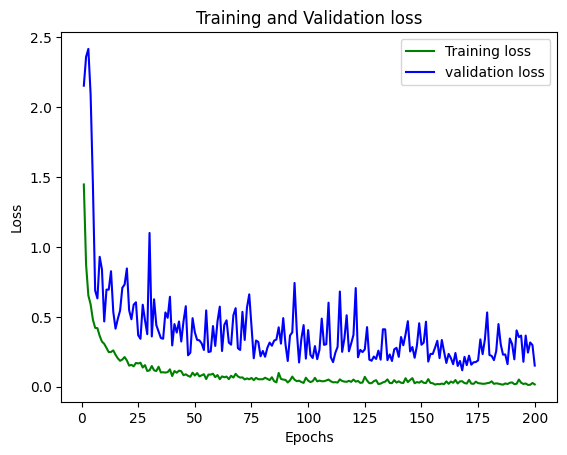

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

Testing the model from epoch 168 on test data.

In [10]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/My Drive/epoch_168.h5')

In [11]:
test_loss, test_accuracy = best_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

38/38 [==============================] - 3s 79ms/step - loss: 0.3760 - accuracy: 0.9000
Test Accuracy: 90.00%
Test Loss: 0.3760
